In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('ordinal_encoding.csv')
preterm_df = df[df['Gestation'] < 37]
term_df = df[df['Gestation'] >= 37]

In [4]:
preterm_df.describe()

record_number  Gestation        Age     Parity  Abortions     Weight  \
count      19.000000  19.000000  19.000000  19.000000  19.000000  19.000000   
mean      143.789474  35.042105  28.631579   0.421053   0.421053  67.842105   
std        72.981412   1.879810   4.449851   0.507257   0.768533   8.858537   
min         0.000000  31.000000  20.000000   0.000000   0.000000  57.000000   
25%       105.000000  34.500000  26.000000   0.000000   0.000000  59.500000   
50%       120.000000  35.700000  28.000000   0.000000   0.000000  66.000000   
75%       204.500000  36.400000  31.500000   1.000000   1.000000  73.500000   
max       282.000000  36.700000  39.000000   1.000000   3.000000  84.000000   

       Hypertension  Diabetes  Placental_position  Bleeding_first_trimester  \
count          19.0      19.0           19.000000                 19.000000   
mean            0.0       0.0            0.631579                  0.105263   
std             0.0       0.0            0.495595                  0.315302   
min             0.0       0.0            0.000000                  0.000000   
25%             0.0       0.0            0.000000                  0.000000   
50%             0.0       0.0            1.000000                  0.000000   
75%             0.0       0.0            1.000000                  0.000000   
max             0.0       0.0            1.000000                  1.000000   

       Bleeding_second_trimester  Funneling     Smoker  Root Mean Square  \
count                  19.000000  19.000000  19.000000         19.000000   
mean                    0.105263   0.157895   0.052632         14.786300   
std                     0.315302   0.374634   0.229416          6.932793   
min                     0.000000   0.000000   0.000000          6.013000   
25%                     0.000000   0.000000   0.000000         10.119100   
50%                     0.000000   0.000000   0.000000         14.312800   
75%                     0.000000   0.000000   0.000000         17.324000   
max                     1.000000   1.000000   1.000000         29.463000   

       Median Frequency  Peak Frequency  Sample Entropy  
count         19.000000       19.000000       19.000000  
mean           0.190489        0.141147        0.577632  
std            0.050068        0.065094        0.214999  
min            0.143800        0.081900        0.043000  
25%            0.161450        0.103900        0.461000  
50%            0.168800        0.117300        0.502000  
75%            0.203600        0.158000        0.779500  
max            0.317900        0.315900        0.866000

In [5]:
term_df.describe()

record_number  Gestation         Age      Parity   Abortions  \
count     150.000000  150.00000  150.000000  150.000000  150.000000   
mean      137.826667   39.53600   29.220000    0.493333    0.346667   
std        86.273153    1.08345    4.769689    0.711805    0.685288   
min         3.000000   37.00000   20.000000    0.000000    0.000000   
25%        65.500000   38.90000   26.000000    0.000000    0.000000   
50%       136.500000   39.70000   29.000000    0.000000    0.000000   
75%       210.250000   40.30000   32.000000    1.000000    0.750000   
max       299.000000   44.00000   43.000000    3.000000    3.000000   

           Weight  Hypertension    Diabetes  Placental_position  \
count  150.000000    150.000000  150.000000          150.000000   
mean    69.593333      0.013333    0.020000            0.526667   
std      9.399484      0.115082    0.140469            0.500961   
min     52.000000      0.000000    0.000000            0.000000   
25%     63.000000      0.000000    0.000000            0.000000   
50%     68.000000      0.000000    0.000000            1.000000   
75%     75.000000      0.000000    0.000000            1.000000   
max    103.000000      1.000000    1.000000            1.000000   

       Bleeding_first_trimester  Bleeding_second_trimester   Funneling  \
count                150.000000                 150.000000  150.000000   
mean                   0.153333                   0.026667    0.040000   
std                    0.361516                   0.161647    0.196616   
min                    0.000000                   0.000000    0.000000   
25%                    0.000000                   0.000000    0.000000   
50%                    0.000000                   0.000000    0.000000   
75%                    0.000000                   0.000000    0.000000   
max                    1.000000                   1.000000    1.000000   

           Smoker  Root Mean Square  Median Frequency  Peak Frequency  \
count  150.000000        150.000000        150.000000      150.000000   
mean     0.080000         14.015771          0.233055        0.161109   
std      0.272202          8.458765          0.263282        0.243379   
min      0.000000          2.531100          0.114900        0.084900   
25%      0.000000          8.320250          0.155750        0.102100   
50%      0.000000         12.621100          0.171450        0.112950   
75%      0.000000         17.745850          0.201925        0.152100   
max      1.000000         66.800200          2.118100        2.761800   

       Sample Entropy  
count      150.000000  
mean         0.679040  
std          0.157897  
min          0.229000  
25%          0.575000  
50%          0.704000  
75%          0.791500  
max          0.981000

transforming gestation period to label __run once__

In [6]:
boolean_mask = pd.Series(df['Gestation'] < 37)
df.loc[boolean_mask,'Gestation'] = 'preterm'
inverted_boolean_mask = boolean_mask != True
df.loc[inverted_boolean_mask,'Gestation'] = 'term'
df['Gestation'].head()

0    preterm
1       term
2       term
3       term
4       term
Name: Gestation, dtype: object

## ~~Principal Component Analysis~~
A __linear feature extraction technique__: 

performs a linear mapping of the data to a lower-dimensionnal space, while maximizing the variance in the low-dimensional representation

aka: drop the least important features. New features are independent of one another.

Feature Extraction = __create new independent features__ that is a combination of each of the old independent features

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
FEATURES = [
'Age', 
'Parity', 
'Abortions', 
'Weight', 
'Hypertension', 
'Diabetes', 
'Placental_position', 
'Bleeding_first_trimester', 
'Bleeding_second_trimester', 
'Funneling', 
'Smoker',
'Root Mean Square',
'Median Frequency',
'Peak Frequency',
'Sample Entropy'
]

In [9]:
x = df.loc[:, FEATURES].values
print(len(x[0]))
y = df['Gestation']

15


In [10]:
x = StandardScaler().fit_transform(x)
x[0]

array([ 0.17958137, -0.70428441, -0.51377848, -1.22493757, -0.10943513,
       -0.13443321,  0.9258201 , -0.41666667, -0.19185884, -0.23717082,
       -0.28867513,  1.67178688,  0.33302879,  0.68396403, -0.99111259])

### trying 2 dimensions
it only covers 25% of the information, did not capture enough info

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['pc 1', 'pc 2'])
principal_df.head()

pc 1      pc 2
0 -1.538913  1.897976
1  1.197301 -1.332375
2  0.764800 -0.835963
3  0.598894  0.594839
4 -0.037954 -0.217114

combine features with target, to a new data frame

In [12]:
final_df = pd.concat([principal_df, df[['Gestation']]],axis=1)
final_df.head()

pc 1      pc 2 Gestation
0 -1.538913  1.897976   preterm
1  1.197301 -1.332375      term
2  0.764800 -0.835963      term
3  0.598894  0.594839      term
4 -0.037954 -0.217114      term

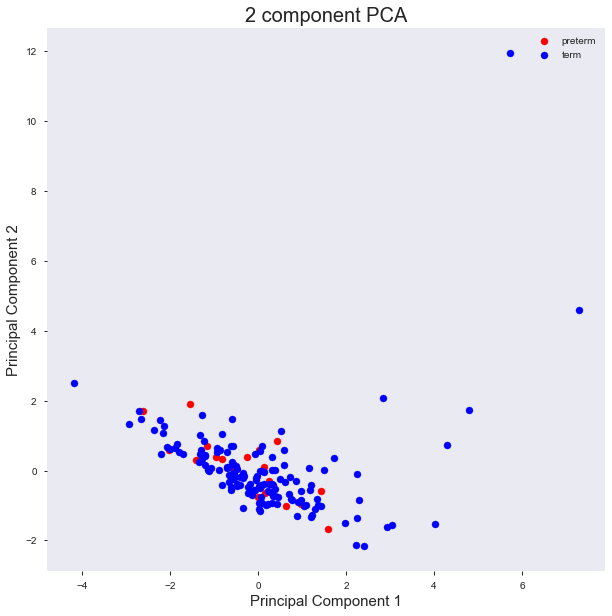

In [13]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['preterm', 'term']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Gestation'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'pc 1'], final_df.loc[indicesToKeep, 'pc 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [14]:
sum(pca.explained_variance_ratio_)

0.25849840250228495

## 3 d

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [16]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['pc 1', 'pc 2', 'pc 3'])
principal_df.head()
final_df = pd.concat([principal_df, df[['Gestation']]],axis=1)
final_df.head()

pc 1      pc 2      pc 3 Gestation
0 -1.538913  1.897976  0.317906   preterm
1  1.197301 -1.332375 -0.768286      term
2  0.764800 -0.835963 -0.570211      term
3  0.598894  0.594839 -0.681488      term
4 -0.037954 -0.217114  1.313243      term

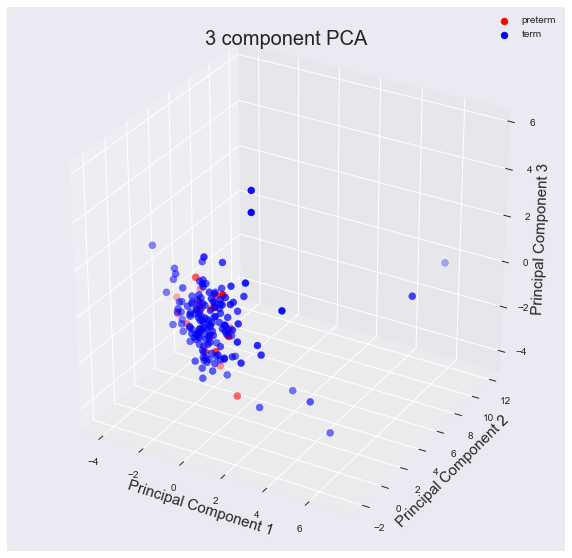

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)
targets = ['preterm', 'term']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['Gestation'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'pc 1'], final_df.loc[indicesToKeep, 'pc 2'], final_df.loc[indicesToKeep, 'pc 3'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [18]:
px_fig = px.scatter_3d(final_df, x='pc 1', y='pc 2', z='pc 3', color='Gestation')
px_fig.show()

### 3+ dimensions
how many variance do we want to keep?

In [19]:
for i in range(3,15):
    pca = PCA(n_components=i)
    principal_components = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

3 0.36072593212688914
4 0.45316150203045125
5 0.5299932513314278
6 0.60204377874542
7 0.6690416738027095
8 0.7316444098030035
9 0.78988376738348
10 0.8416344477167463
11 0.8868549402332154
12 0.9283785183008393
13 0.9645903714583165
14 0.9856434256401382


## TSNE Plots
t-Distributed Stochastic Neighbor Embedding (tSNE)

__non-linear technique for dimensionality reduction.__

Calculates the probability of similarity of points in high-dimensional space and its corresponding low-dimensional space. Similarity calculated as the conditionaly probability, that a point A would choose point B as its neighbor, if neighbors were picked in proportion to their probability density under a Gaussian distribution centered at A.

It then tries to minimize the difference between these conditional probabilities in hi- and lo-dimensional space, for a perfect representation of data points in lower-dimensional space.

To measure the minimization of the sum of difference of conditional probability t-SNE minimizes the sum of Kullback-Leibller divergence of overall data points using a gradient descent method.

input features no longer identifiable.

__mainly a data exploration and visualization technique__

In [20]:
from sklearn import manifold
from sklearn import preprocessing
import seaborn as sns

In [21]:
tsne = manifold.TSNE(n_components=2, init='pca' , method='exact' , random_state=4 , perplexity=60) 

In [22]:
X_standardized = preprocessing.scale(x) #standardize your data

In [23]:
x_tsne= tsne.fit_transform(X_standardized) #perform tsne

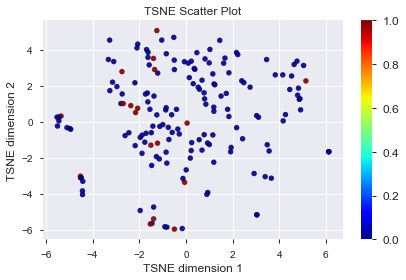

In [24]:
fig = plt.figure();
cm=plt.cm.get_cmap('jet') #set the colormap
pl=plt.scatter(x_tsne[:,0], x_tsne[:,1] , c=boolean_mask, s= 30, cmap= cm, alpha = 0.9 , edgecolors='none')
#figure formating
plt.title('TSNE Scatter Plot')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.xlabel('TSNE dimension 1', fontsize=12)
plt.ylabel('TSNE dimension 2', fontsize=12)
plt.colorbar(pl)
plt.tight_layout()

## EDA

### Correlation

In [25]:
corr = df.corr()

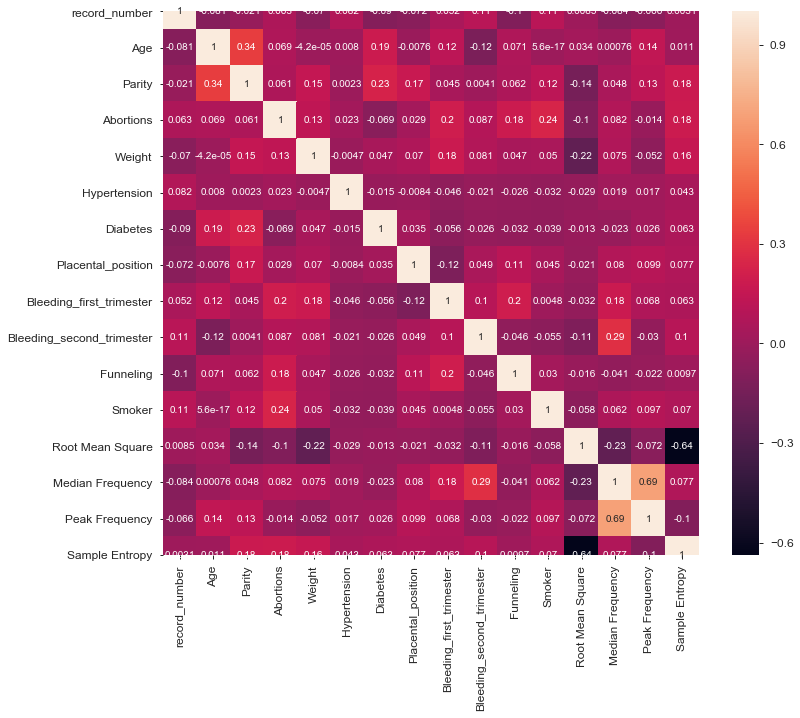

In [26]:
fig = plt.figure(figsize=(12, 10))
sns.heatmap(data=corr, annot=True)

__Strong positive correlation:
median frequency and peak frequency__

__Strong negative correlation:
root mean square and sample entropy__


### stats

In [27]:
df = pd.read_csv('ordinal_encoding.csv')

In [28]:
df.describe()

record_number   Gestation         Age      Parity  Abortions  \
count     169.000000  169.000000  169.000000  169.000000  169.00000   
mean      138.497041   39.030769   29.153846    0.485207    0.35503   
std        84.708472    1.856584    4.725816    0.690984    0.69307   
min         0.000000   31.000000   20.000000    0.000000    0.00000   
25%        71.000000   38.600000   26.000000    0.000000    0.00000   
50%       134.000000   39.600000   29.000000    0.000000    0.00000   
75%       208.000000   40.100000   32.000000    1.000000    1.00000   
max       299.000000   44.000000   43.000000    3.000000    3.00000   

           Weight  Hypertension    Diabetes  Placental_position  \
count  169.000000    169.000000  169.000000          169.000000   
mean    69.396450      0.011834    0.017751            0.538462   
std      9.331347      0.108461    0.132439            0.500000   
min     52.000000      0.000000    0.000000            0.000000   
25%     63.000000      0.000000    0.000000            0.000000   
50%     68.000000      0.000000    0.000000            1.000000   
75%     75.000000      0.000000    0.000000            1.000000   
max    103.000000      1.000000    1.000000            1.000000   

       Bleeding_first_trimester  Bleeding_second_trimester   Funneling  \
count                169.000000                 169.000000  169.000000   
mean                   0.147929                   0.035503    0.053254   
std                    0.356085                   0.185597    0.225208   
min                    0.000000                   0.000000    0.000000   
25%                    0.000000                   0.000000    0.000000   
50%                    0.000000                   0.000000    0.000000   
75%                    0.000000                   0.000000    0.000000   
max                    1.000000                   1.000000    1.000000   

           Smoker  Root Mean Square  Median Frequency  Peak Frequency  \
count  169.000000        169.000000        169.000000      169.000000   
mean     0.076923         14.102399          0.228270        0.158864   
std      0.267261          8.286612          0.248855        0.230278   
min      0.000000          2.531100          0.114900        0.081900   
25%      0.000000          8.329100          0.156400        0.102100   
50%      0.000000         12.878600          0.170800        0.113400   
75%      0.000000         17.802400          0.202100        0.153600   
max      1.000000         66.800200          2.118100        2.761800   

       Sample Entropy  
count      169.000000  
mean         0.667639  
std          0.167621  
min          0.043000  
25%          0.548000  
50%          0.689000  
75%          0.792000  
max          0.981000

outliers, >3*IQR:
* root mean square
* median frequency
* peak frequency

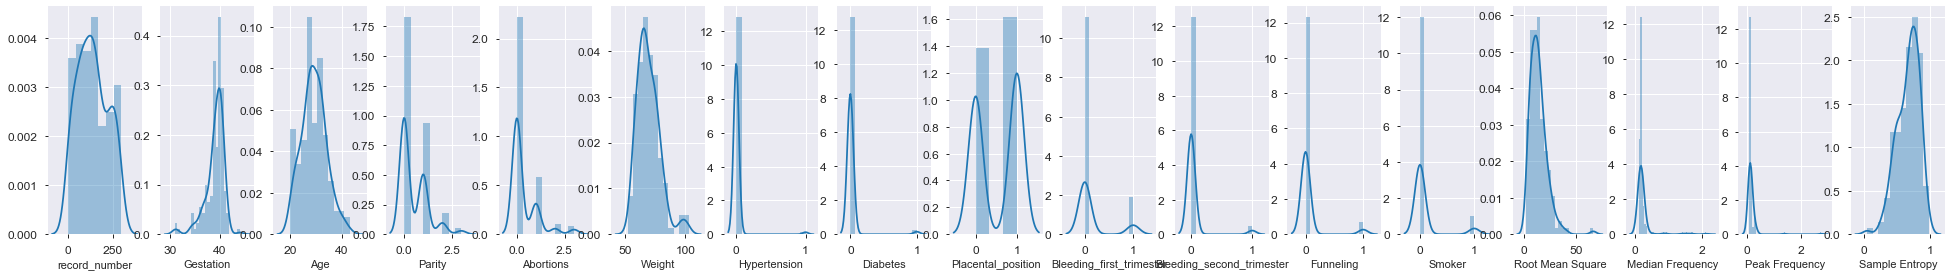

In [29]:
l = df.columns.values
number_of_columns=len(l)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

## Pandas profile

In [31]:
import pandas_profiling 

In [32]:
df.profile_report()